
<p style="font-size:30px;text-align:center"> <b>Assignment 2</b> </p>

### Q1. Spatial filtering
Write a Python function that uses the convolution method to perform spatial filtering on an image. Start by padding your image with 5 rows and columns to the border of the image, the value of the padding should be 0. Apply an averaging filter and Gaussian filter with a kernel size of 5x5 to image given below.   

<img src='image1.png'/>

***Display the filtered image in your report***

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings("ignore") # Ignore warnings if any
import cv2 # Importing Open CV library
import numpy as np # Importing Numpy for matrix operations
import matplotlib.pyplot as plt # Useful for plotting the images
import scipy.misc

#### Defining Spatial Filtering Function

In [8]:
def spatial_convolution(row, col, pad_img, filter_name):
    '''This function returns the matrix image after applying spatial convolution on the matrix with the help of given filter'''
    for x in range(2, row-2):
        for y in range(2, col-2):
            part_img = np.array([[pad_img[x+2,y+2],pad_img[x+2,y+1],pad_img[x+2,y],pad_img[x+2,y-1],pad_img[x+2,y-2]],
                                 [pad_img[x+1,y+2],pad_img[x+1,y+1],pad_img[x+1,y],pad_img[x+1,y-1],pad_img[x+1,y-2]],
                                 [pad_img[x,y+2],pad_img[x,y+1],pad_img[x,y],pad_img[x,y-1],pad_img[x,y-2]],
                                 [pad_img[x-1,y+2],pad_img[x-1,y+1],pad_img[x-1,y],pad_img[x-1,y-1],pad_img[x-1,y-2]],
                                 [pad_img[x-2,y+2],pad_img[x-2,y+1],pad_img[x-2,y],pad_img[x-2,y-1],pad_img[x-2,y-2]]])
            pad_img[x, y] = sum(sum(np.multiply(filter_name,part_img)))
    return pad_img

================ Original Image ================


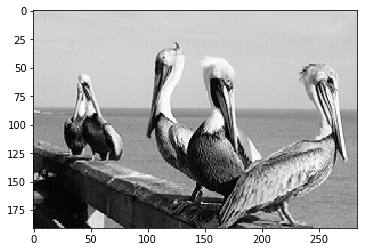

In [9]:
img = cv2.imread('ducks.png') # Read image
print("="*16, "Original Image", "="*16)
plt.imshow(img)
plt.show() # Display the original image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Read the grayscale version of above image

# Averaging Filter
avg_filter = np.array([[1/25,1/25,1/25,1/25,1/25],
                       [1/25,1/25,1/25,1/25,1/25],
                       [1/25,1/25,1/25,1/25,1/25],
                       [1/25,1/25,1/25,1/25,1/25],
                       [1/25,1/25,1/25,1/25,1/25]])

# Gaussian Filter
gaussian_filter = (1/273) * np.array([[1,4,7,4,1],
                                     [4,16,26,16,4],
                                     [7,26,41,26,7],
                                     [4,16,26,16,4],
                                     [1,4,7,4,1]])

#### Spatial Convolution with Averaging Filter

=========== Average Filtered Image ===========


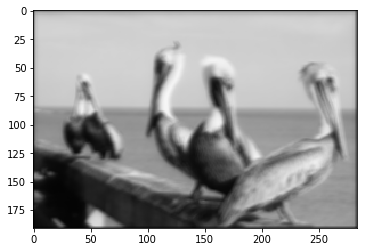

In [10]:
# Pad image with zeros, attribute1 = (top, bottom), attribute2 = (left, right)
avg_pad_img = np.pad(gray_img, ((2,2),(2,2)), 'constant') 
row = avg_pad_img.shape[0] # How many rows?
col = avg_pad_img.shape[1] # How many columns?

# Call spatial_convolution function with averaging filter
avg_filtered_img = spatial_convolution(row, col, avg_pad_img, avg_filter) # Function call
avg_filtered_img = avg_filtered_img[2:-2,2:-2] # Remove padded rows and columns
scipy.misc.imsave('Avg_Filtered_image.png', avg_filtered_img) # Save the filtered image in pwd
print("="*11, "Average Filtered Image", "="*11)
Avg_Filtered_image = cv2.imread('Avg_Filtered_image.png') # Read the filtered image from pwd
plt.imshow(Avg_Filtered_image)
plt.show() # Display the filtered image
Avg_Filtered_img = cv2.cvtColor(Avg_Filtered_image, cv2.COLOR_BGR2GRAY) # Read the grayscale version of filtered image

#### Spatial Convolution with Gaussian Filter

=========== Gaussian Filtered Image ===========


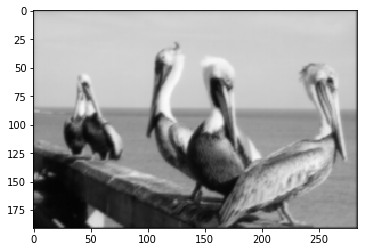

In [11]:
# Pad image with zeros, attribute1 = (top, bottom), attribute2 = (left, right)
gaussian_pad_img = np.pad(gray_img, ((2,2),(2,2)), 'constant') 
row = gaussian_pad_img.shape[0] # How many rows?
col = gaussian_pad_img.shape[1] # How many columns?

# Call spatial_convolution function with Gaussian filter
gaussian_filtered_img = spatial_convolution(row, col, gaussian_pad_img, gaussian_filter) # Function call
gaussian_filtered_img = gaussian_filtered_img[2:-2,2:-2] # Remove padded rows and columns
scipy.misc.imsave('Gaussian_Filtered_image.png', gaussian_filtered_img) # Save the filtered image in pwd
print("="*11, "Gaussian Filtered Image", "="*11)
Gaussian_Filtered_image = cv2.imread('Gaussian_Filtered_image.png') # Read the filtered image from pwd
plt.imshow(Gaussian_Filtered_image)
plt.show() # Display the filtered image
Gaussian_Filtered_img = cv2.cvtColor(Gaussian_Filtered_image, cv2.COLOR_BGR2GRAY) # Read the grayscale version of filtered image

### Q2. Image sharpening by Unsharp Masking and Highboost Filtering
Write a Python function to perform the following steps
1. Blur the original image (Output of the first exercise)
2. Subtract the blurred image from the original (mask)
3. Add the mask to the original

<img src='image2.png'/>

***Display the sharpened image in your report***

#### Defining Image Sharpening Function

In [12]:
def image_sharpening(original_image, blurred_image, k):
    '''This function finds out the sharpened image using above formula'''
    # Generate masked image using above formula
    masked_img = original_image - blurred_image
    # Add a weighted portion to get sharpened image using above formula
    sharpened_img = original_image + k * masked_img
    return sharpened_img

#### Unsharp Masking

===== Unsharp Masked Image using Averaging Filter =====


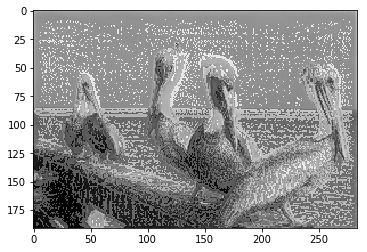

===== Unsharp Masked Image using Gaussian Filter =====


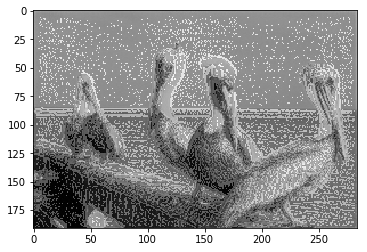

In [13]:
 # Using Averaging Filter 
Avg_sharpened_img = image_sharpening(gray_img, Avg_Filtered_img, 0.5) # Taking k = 0.5
scipy.misc.imsave('Avg_Sharpened_image.png', Avg_sharpened_img) # Save the sharpened image in pwd
print("="*5, "Unsharp Masked Image using Averaging Filter", "="*5)
Average_Sharpened_image = cv2.imread('Avg_Sharpened_image.png') # Read the sharpened image from pwd
plt.imshow(Average_Sharpened_image)
plt.show() # Display the sharpened image

# Using Gaussian Filter 
Gaussian_sharpened_img = image_sharpening(gray_img, Gaussian_Filtered_img, 0.5) # Taking k = 0.5
scipy.misc.imsave('Gaussian_Sharpened_image.png', Gaussian_sharpened_img) # Save the sharpened image in pwd
print("="*5, "Unsharp Masked Image using Gaussian Filter", "="*5)
Gaussian_Sharpened_image = cv2.imread('Gaussian_Sharpened_image.png') # Read the sharpened image from pwd
plt.imshow(Gaussian_Sharpened_image)
plt.show() # Display the sharpened image

#### Highboost Filtering

===== Highboost Filtered Image using Averaging Filter =====


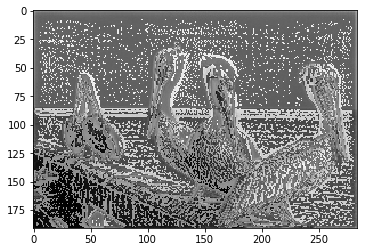

===== Highboost Filtered Image using Gaussian Filter =====


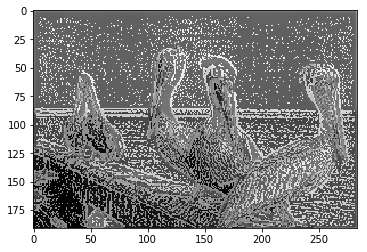

In [14]:
# Using Averaging Filter 
Avg_sharpened_img = image_sharpening(gray_img, Avg_Filtered_img, 1.2) # Taking k = 1.2
scipy.misc.imsave('Avg_Sharpened_highboost_image.png', Avg_sharpened_img) # Save the sharpened image in pwd
print("="*5, "Highboost Filtered Image using Averaging Filter", "="*5)
Average_Sharpened_image = cv2.imread('Avg_Sharpened_highboost_image.png') # Read the sharpened image from pwd
plt.imshow(Average_Sharpened_image)
plt.show() # Display the sharpened image

# Using Gaussian Filter 
Gaussian_sharpened_img = image_sharpening(gray_img, Gaussian_Filtered_img, 1.2) # Taking k = 1.2
scipy.misc.imsave('Gaussian_Sharpened_highboost_image.png', Gaussian_sharpened_img) # Save the sharpened image in pwd
print("="*5, "Highboost Filtered Image using Gaussian Filter", "="*5)
Gaussian_Sharpened_image = cv2.imread('Gaussian_Sharpened_highboost_image.png') # Read the sharpened image from pwd
plt.imshow(Gaussian_Sharpened_image)
plt.show() # Display the sharpened image